<a href="https://colab.research.google.com/github/codekshitij/CNN/blob/main/MNIST_DATASET_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#load dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test/255.0

x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([

    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Watch validation loss
    patience=2,            # If val_loss doesn't improve for 2 epochs, stop
    restore_best_weights=True # Roll back to best weights after stopping
)

history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8598 - loss: 0.4723 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9857 - val_loss: 0.0496
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9878 - val_loss: 0.0439
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9878 - val_loss: 0.0399
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9880 - val_loss: 0.0421
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9902 - val_loss: 0.0388
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9897 - val_loss: 0.0437
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0116 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"\nTest Accuracy : {test_acc*100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.9892 - loss: 0.0323

Test Accuracy : 98.92%


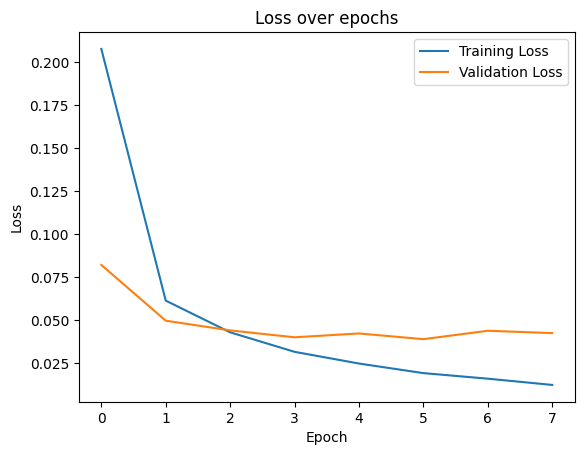

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

X_train, X_test = X_train[..., tf.newaxis], X_test[..., tf.newaxis]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers


In [ ]:
mmodel = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
mmodel.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlyy_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights = True
)

hhistory = mmodel.fit(X_train, Y_train, epochs = 8, validation_split= 0.1, batch_size=64, callbacks=[earlyy_stopping] )

Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6385 - loss: 0.9790 - val_accuracy: 0.8165 - val_loss: 0.4958
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8226 - loss: 0.4876 - val_accuracy: 0.8472 - val_loss: 0.4180
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8511 - loss: 0.4096 - val_accuracy: 0.8487 - val_loss: 0.4180
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8622 - loss: 0.3747 - val_accuracy: 0.8615 - val_loss: 0.3663
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8709 - loss: 0.3481 - val_accuracy: 0.8757 - val_loss: 0.3339
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8786 - loss: 0.3235 - val_accuracy: 0.8715 - val_loss: 0.3319
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8855 - loss: 0.3055 - val_accuracy: 0.8760 - val_loss: 0.3319
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8928 - loss: 0.2889 - val_accuracy: 0.8775 - 

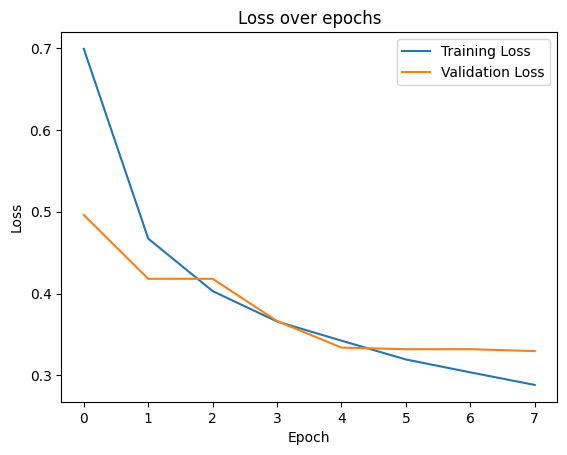

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hhistory.history['loss'], label='Training Loss')
plt.plot(hhistory.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()